<ipython-input-2-ac42022f3c91>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
<ipython-input-2-ac42022f3c91>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


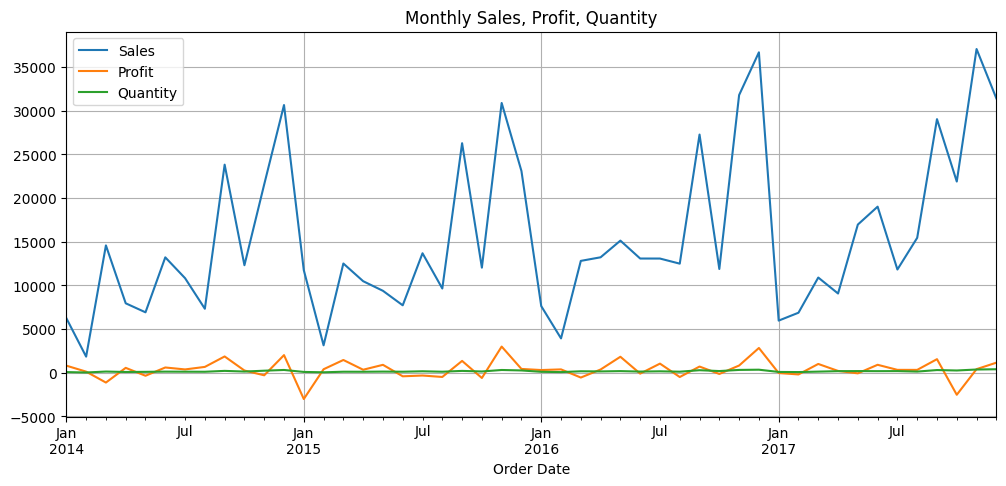

Selected lag order: 8


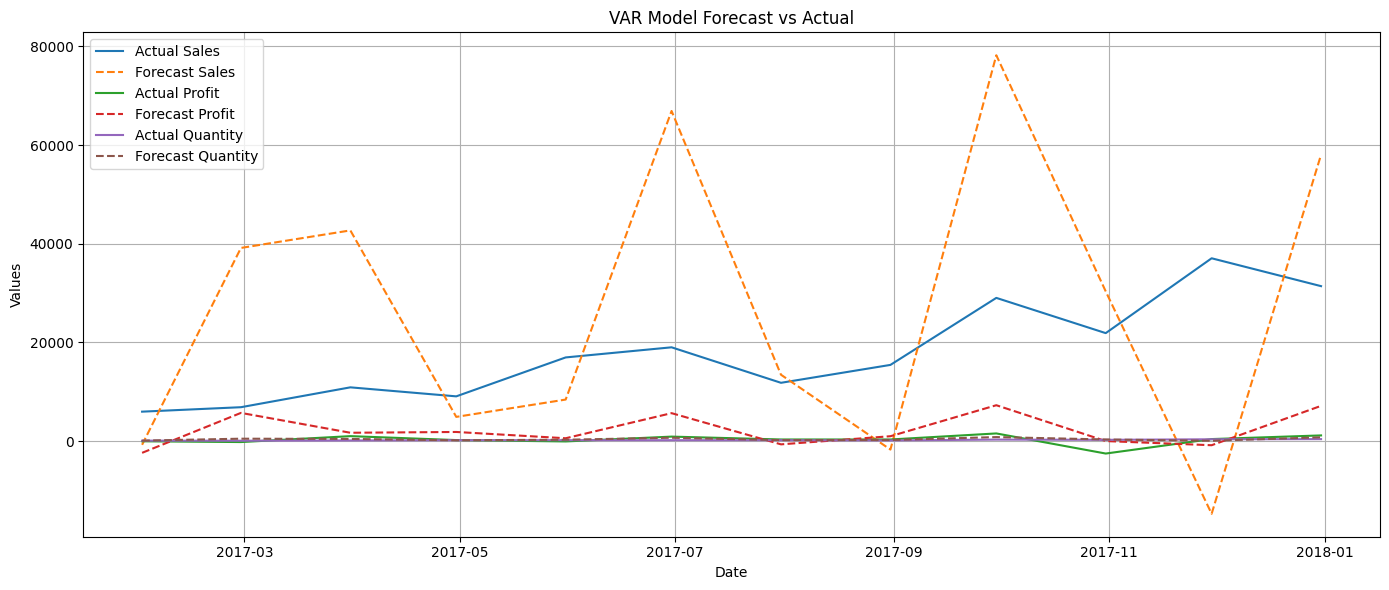

Sales RMSE: 29813.29
Profit RMSE: 3471.99
Quantity RMSE: 292.31


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np
df = pd.read_csv('/content/Super_Store_data.csv', encoding='ISO-8859-1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
data = df[['Sales', 'Profit', 'Quantity']].resample('M').sum()
data = data.fillna(method='ffill')
data.plot(title='Monthly Sales, Profit, Quantity', figsize=(12, 5))
plt.grid(True)
plt.show()
n_obs = 12
train = data[:-n_obs]
test = data[-n_obs:]
model = VAR(train)
model_fitted = model.fit(ic='aic')
print(f"Selected lag order: {model_fitted.k_ar}")
forecast_input = train.values[-model_fitted.k_ar:]
forecast = model_fitted.forecast(y=forecast_input, steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Sales_Forecast', 'Profit_Forecast', 'Quantity_Forecast'])
plt.figure(figsize=(14, 6))
for col in ['Sales', 'Profit', 'Quantity']:
    plt.plot(test.index, test[col], label=f'Actual {col}')
    plt.plot(forecast_df.index, forecast_df[f'{col}_Forecast'], linestyle='--', label=f'Forecast {col}')

plt.title('VAR Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for i, col in enumerate(['Sales', 'Profit', 'Quantity']):
    rmse = np.sqrt(mean_squared_error(test[col], forecast_df[f'{col}_Forecast']))
    print(f'{col} RMSE: {rmse:.2f}')
